In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error



In [2]:
df = pd.read_csv("../dataset/training_final.csv")  # already have your dataframe



In [3]:
# --- 2. Features and targets ---
features = [
    'latitude', 'longitude', 'year', 'month', 'day',
    'tp_mm', 't2m_C', 'anomaly_T2m_C', 'heat_stress_proxy',
    'tp_7d_cum', 'tp_14d_cum', 'tp_7d_avg', 'consec_rain_days',
    'tp_lag1', 'tp_lag3', 'tp_lag7', 'heavy_rain',
    'month_sin', 'month_cos', 'heat_proxy',
    'tp_anomaly', 'tp_std_anomaly', 'heatwave_flag'
]

targets = ['heat_next_day', 'heat_next_2days', 'heat_next_3days']

X = df[features]
y = df[targets]



In [4]:
# --- 3. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 4. Scaling features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [5]:
# --- 5. Define XGBoost regressor ---
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# --- 6. Wrap in MultiOutputRegressor ---
multi_xgb = MultiOutputRegressor(xgb)

# --- 7. Train the model ---
multi_xgb.fit(X_train_scaled, y_train)




MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None, ...))

In [6]:
# --- 8. Predictions ---
y_pred = multi_xgb.predict(X_test_scaled)



In [7]:
# --- 9. Evaluate ---
for i, target in enumerate(targets):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    print(f"MSE for {target}: {mse:.4f}")

MSE for heat_next_day: 0.0338
MSE for heat_next_2days: 0.0443
MSE for heat_next_3days: 0.0503


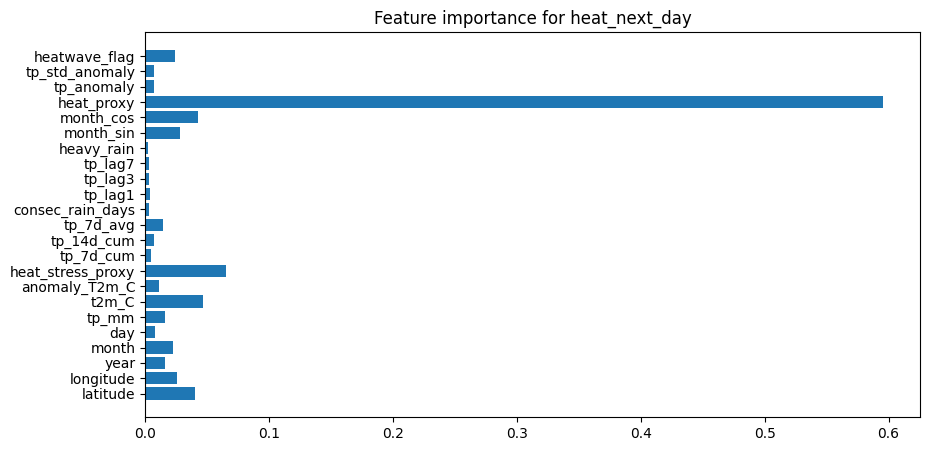

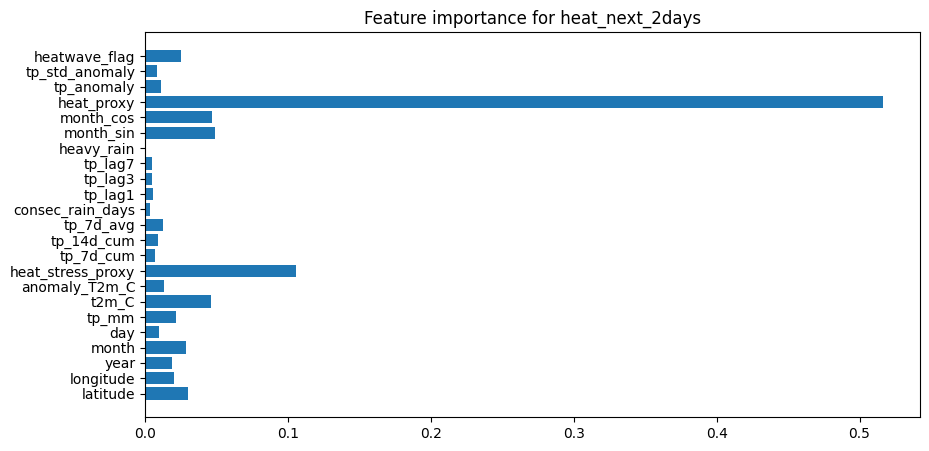

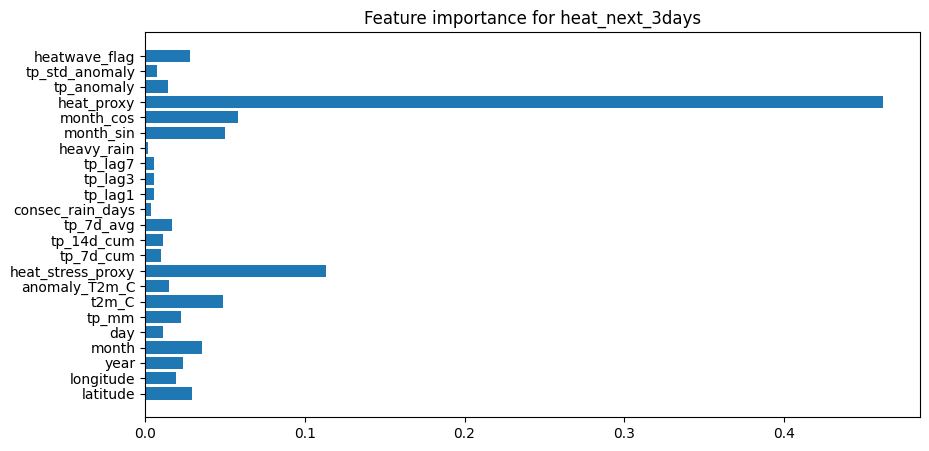

In [8]:
import matplotlib.pyplot as plt
import numpy as np

for i, target in enumerate(targets):
    xgb_model = multi_xgb.estimators_[i]
    importance = xgb_model.feature_importances_
    plt.figure(figsize=(10, 5))
    plt.barh(features, importance)
    plt.title(f"Feature importance for {target}")
    plt.show()
